In [57]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob
import pandas as pd
from scipy import signal as sn
plt.style.use('ggplot')



videos=['videos/20250528_170906-003.mp4','videos/20250528_173138.mp4','videos/20250528_173920.mp4','videos/20250528_175822.mp4',
        'videos/C1862-001.MP4','videos/C1871.MP4','videos/C1872.MP4','videos/C1873.MP4','videos/C1883-001.MP4','videos/C1888-003.MP4','videos/C1889-002.MP4']
paths=[f"frames_video{i+1}/*" for i in range(len(videos))]


In [58]:
path_list=glob.glob(paths[9])
img = cv.imread(path_list[152],cv.IMREAD_COLOR_RGB)
img = img[415:1423,1845:2848]

In [ ]:

p1 = path_list[152]
p2 = path_list[5838]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[415:1423,1845:2848]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[415:1423,1845:2848]

print(img1.dtype)

In [ ]:
delta = (img1 - img2).astype(np.float64)
delta = delta


In [ ]:
# plt.imshow(img1)
# plt.figure()
# plt.imshow(img2)
# plt.figure()
plt.imshow(delta)

In [ ]:
threshold = 200
arr_new = np.where(delta > threshold, 0, delta)

plt.imshow(arr_new)


In [ ]:
arr_new

In [ ]:
arr_new2 = np.where(arr_new > 30, 255, arr_new)
# arr_new2 = np.where(arr_new < 30, 0, arr_new)
arr_new2[arr_new2 < 30] = 0
# plt.figure(figsize=(16*2,9*2))
plt.imshow(arr_new2)

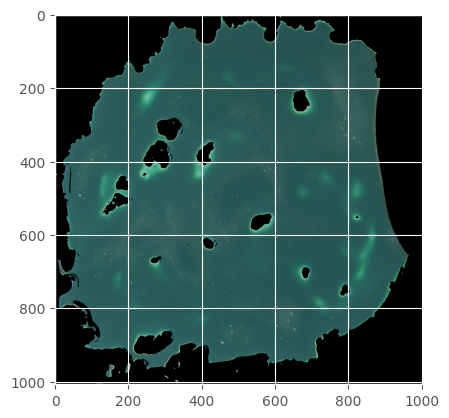

In [73]:
mask = (arr_new2 == 255)
img = cv.imread(path_list[-1],cv.IMREAD_COLOR_RGB)
img = img[415:1423,1845:2848]

output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]            # Copiar solo donde mask es True

plt.imshow(output)

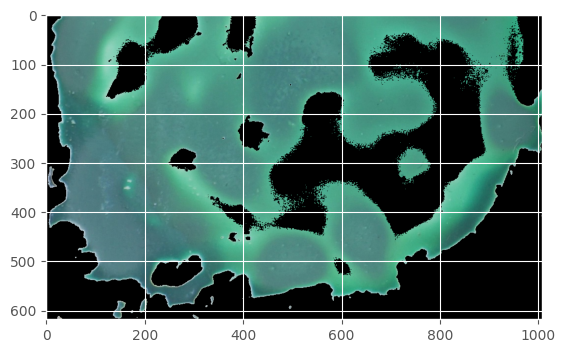

In [96]:
path_list=glob.glob(paths[10])

p1 = path_list[876]
p2 = path_list[2991]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[738:1356 , 1838:2846]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[738:1356 , 1838:2846]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

i = path_list[993]

img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[738:1356 , 1838:2846]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)